In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
#from vaegan_fc import *
#from vaegan_conv import *
from cvaegan_conv import *
from cvaegan import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
tf.reset_default_graph()

In [13]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(256)
build_decoder = Decoder(256)
build_discriminator = Discriminator(512)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-3, num_epochs = 5, load=False, lr_decay=1., gamma=1.,
          checkpoint_name='test'
)

In [137]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
               load_file = 'checkpoints/cvaegan_conv_good2', checkpoint_name='test'
)

In [30]:
model.train()

Epoch 11 loss: 108.816214239 (time: 34.0028910637 s)
Epoch 12 loss: 108.228141202 (time: 36.6548960209 s)
Epoch 13 loss: 107.559438809 (time: 36.3600409031 s)
Epoch 14 loss: 107.134433608 (time: 36.7834298611 s)
Epoch 15 loss: 106.813980408 (time: 37.4610729218 s)
3.39537600279 min


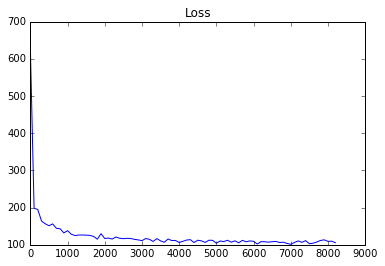

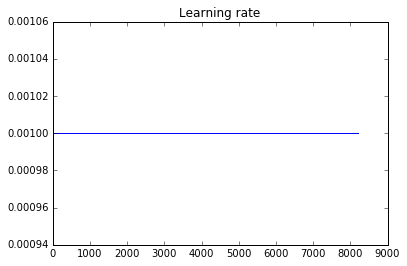

In [31]:
log = model.log
log = np.array(log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

In [32]:
x = mnist.test.images[xrange(100)]
x_dis_real = sess.run(model.dis_real, feed_dict={model.x:x})
#print dis_real.T

0.533731


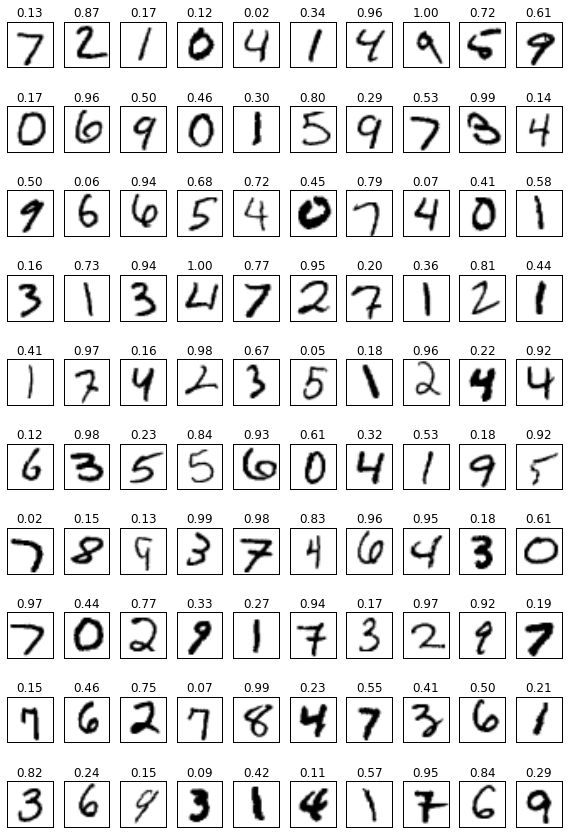

In [33]:
num_examples=10
print np.mean(x_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(x[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(x_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [34]:
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)

In [35]:
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})
#print gen_dis_real.T

0.0614717


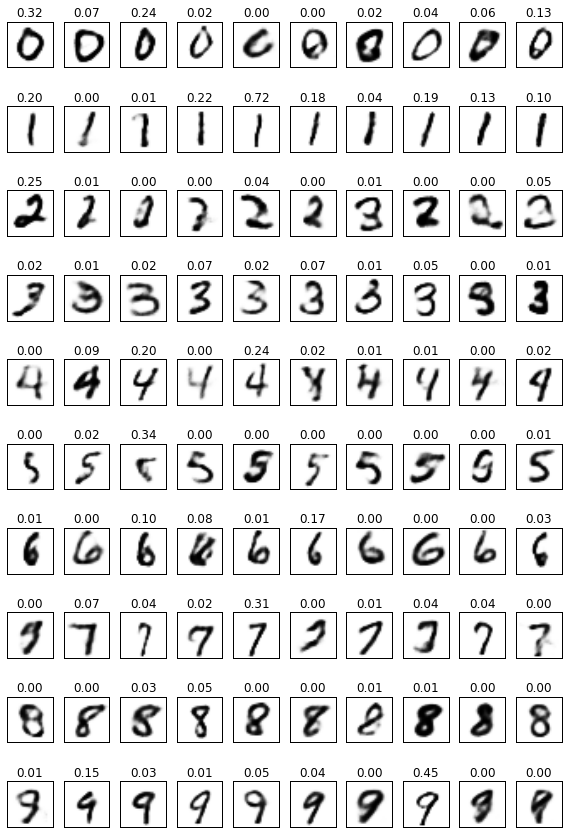

In [38]:
num_examples=10
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_fc_gen_1')
plt.show()

In [37]:
rando = np.random.randn(100, 28*28)
rando_dis_real = sess.run(model.dis_real, feed_dict={model.x:rando})
print rando_dis_real.T

[[  1.62633924e-08   1.00000000e+00   9.97643769e-01   4.13817586e-04
    7.32433669e-09   3.44866479e-04   9.99996543e-01   3.57577221e-08
    4.99428916e-06   9.99978304e-01   9.16946471e-01   9.99999046e-01
    3.19550418e-05   1.00000000e+00   1.41323835e-06   3.55490629e-04
    1.72918206e-07   2.97795779e-08   4.60895808e-06   3.97376025e-05
    7.59259478e-07   9.99948502e-01   9.99359190e-01   9.99999642e-01
    2.57279229e-08   9.79176257e-04   1.76692083e-08   9.98420477e-01
    1.53690507e-05   5.49043238e-01   1.66691709e-04   2.73474342e-07
    9.65342842e-05   7.95339438e-05   3.50832963e-08   4.69962700e-08
    6.78325449e-08   7.21643767e-09   9.75001235e-09   9.99999762e-01
    1.00000000e+00   5.98745729e-08   9.99861121e-01   9.99997139e-01
    1.00000000e+00   2.03163214e-02   9.99990582e-01   9.83092785e-01
    9.99999881e-01   4.62887373e-09   1.00000000e+00   2.59131542e-04
    1.26786134e-03   3.21682688e-04   9.99873281e-01   7.88882608e-06
    9.76772249e-01  